In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [103]:
data = pd.read_csv("ex1data1.txt",header = None, names= ['Population','Profit'])

In [104]:
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [105]:
data.shape


(97, 2)

In [106]:
X = data.iloc[:,0]
y= data.iloc[:,-1]
m = len(y)
print(m)
print(X.shape)

97
(97,)


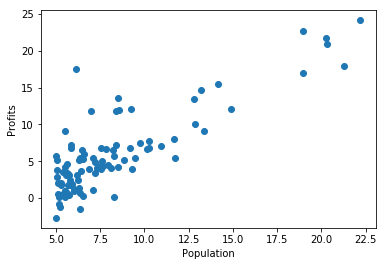

In [107]:
plt.scatter(X,y)
plt.xlabel("Population")
plt.ylabel("Profits")
plt.show()


In [108]:
X = X[:,np.newaxis] #newaxis converts into vector. for ex. it converts x = np.array([-1,2]) to np.array([[-1],[2]])
y = y[:,np.newaxis]

# adding the intercept term
ones = np.ones((m,1)) 
X = np.hstack((ones, X)) #Add a column of ones to x.

In [109]:
def computeCost(X,y,theta):
    J = (np.sum(np.power((np.dot(X, theta) - y),2)))/(2*m)
    return J


In [115]:
theta = np.zeros((2,1))
J = computeCost(X, y, theta)
print('compute and display initial cost: ',J)

compute and display initial cost:  32.072733877455676


In [120]:
#further testing of the cost function
theta = np.array([-1,2])
theta = theta[:,np.newaxis]  #this is similar to theta = np.array([[-1],[2]])
J = computeCost(X, y, theta);
print('further testing of the cost function:', J)

further testing of the cost function: 54.24245508201238


In [121]:
def gradientDescent(X,y,theta,alpha,iterations):
    m = y.size
    J_history = np.zeros(iterations)
    
    for iter in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - alpha * (1/m) * (X.T.dot(h-y))
        J_history[iter] = computeCost(X,y,theta)
    return(theta, J_history)



Running Gradient Descent ...

theta: [-3.70968912  1.17433871]


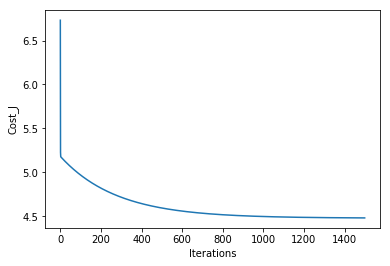

In [122]:
print('\nRunning Gradient Descent ...\n')
#Some gradient descent settings
iterations = 1500
alpha = 0.01

theta, Cost_J = gradientDescent(X, y, theta, alpha, iterations)
print('theta:', theta.ravel())

plt.plot(Cost_J)
plt.xlabel('Iterations')
plt.ylabel('Cost_J')
plt.show()


In [123]:
J = computeCost(X, y, theta);
print('cost function with optimized value of theta: ',J)


cost function with optimized value of theta:  4.48012408392693


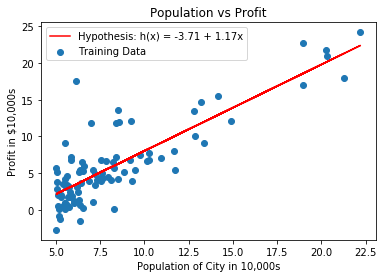

In [124]:
plt.scatter(X[:,1],y, label = 'Training Data')
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], X.dot(theta),color='red',label='Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.legend(loc='best')
plt.show()

In [125]:
#% Predict values for population sizes of 35,000 and 70,000

predict1 = np.dot([1, 3.5],theta) # takes inner product to get y
predict2 = np.dot([1, 7],theta) # takes inner product to get y

print('For population = 35,000, we predict a profit of ', predict1*10000)
print('For population = 70,000, we predict a profit of ', predict2*10000)

For population = 35,000, we predict a profit of  [4004.9636045]
For population = 70,000, we predict a profit of  [45106.81840164]
